# <center> Clustering with K-Means </center>



## K-Means on Iris Dataset

---

In [10]:
import numpy             as np
import gif
import sklearn           as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster              import KMeans
from yellowbrick.cluster.elbow    import kelbow_visualizer
from IPython.display              import HTML
from sklearn.preprocessing        import scale
from sklearn.datasets             import load_iris

In [2]:
X = load_iris().data

In [3]:
class Kmeans:
    def __init__(self, x1, x2, k, dist):
        self.x1    = x1
        self.x2    = x2
        self.k     = k
        self.dist  = dist
        self.party = []
        self.color = ['blue', 'orange', 'green'] # color <--> centroid
        
    def visualization_point_team(self):
        for i in range (self.x1.size):
            for centroid_index in range(self.k):
                if (self.party[i] == centroid_index):
                    plt.scatter(self.x1[i], self.x2[i],
                                color=self.color[centroid_index % len(self.color)], # loop color < centroid
                                alpha=0.5)
    
        
    def init_position_centroid(self):
        ic = [np.random.choice(self.x1.shape[0]) for i in range(self.k)]
        self.centr = np.array([self.x1[ic, 0], self.x2[ic, 0]]).T
        
        
    def init_position_centroid_kmeans_plus(self):
        x = np.random.choice(self.x1.shape[0])
        first_centroid = [self.x1[x, 0], self.x2[x, 0]]
        
        probability_distribution = [dist(first_centroid, [self.x1[i, 0], self.x2[i, 0]]) 
                                    for i in range(self.x1.shape[0])]
        
        probability_distribution = [i/sum(probability_distribution) 
                                    for i in probability_distribution]

        ic = [np.random.choice(self.x1.shape[0], p=probability_distribution) for i in range(self.k - 1)]
        
        ic.append(x)

        self.centr = np.array([self.x1[ic, 0], self.x2[ic, 0]]).T
        
        
    def visualization_Centroid(self):
        for c in range(self.k):
            plt.plot(self.centr[c, 0], self.centr[c, 1], marker="X", markersize=15)
    
    
    def update_Closest_Centroid(self):
        self.party = []
        for i in range(self.x1.size):
            e = []
            for centroid in self.centr:
                point = (self.x1[i], self.x2[i])
                e.append(dist(point, centroid))    

            self.party.append(e.index(min(e)))
            
    def elbow_k_election(self, X):
        kelbow_visualizer(KMeans(), X, k=(1,10))
    
    def update_position_centroid(self):
        for centroidIndex in range(self.k): 
            a, b = 0, 0
            n_point = 0
            for i in range(self.x1.size):
                if (self.party[i] == centroidIndex):
                    a += self.x1[i]
                    b += self.x2[i]
                    n_point += 1
            
            self.centr[centroidIndex, 0] = a / n_point
            self.centr[centroidIndex, 1] = b / n_point
               
            
    def update_Kmeans(self):
        self.update_Closest_Centroid()
        self.update_position_centroid()
        self.visualization_Centroid()
        self.visualization_point_team()
        plt.show()
        
    def check_distance_update(self, actual_position_centroid):
        TOL = 0.001
        dist_update = dist(actual_position_centroid, self.centr)
                
        for distance in dist_update:
            if distance > TOL:
                return False
            
        return True
    
    def animated_update(self, n):
        
        @gif.frame
        def plot(i):
            self.visualization_Centroid()
            self.visualization_point_team()

        frames = []
        for i in range(n):
            actual_position_centroid = self.centr.copy()
            self.update_Closest_Centroid()
            self.update_position_centroid()
            frame = plot(i)
            plt.xlabel('Iteration: ' + str(i))
            frames.append(frame)

            if self.check_distance_update(actual_position_centroid):
                break

        gif.save(frames, 'Simple_kmeans.gif', duration=300)
        plt.close()
        

## Heuristic Elbow Method

---

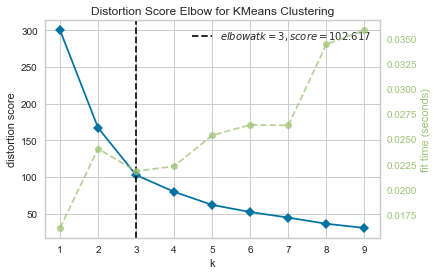

In [11]:
# Euclidian Distance
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Scale variables
x1 = scale(X[:, 0:1], with_mean=True, with_std=True)
x2 = scale(X[:, 1:2], with_mean=True, with_std=True)
k = 3
n = 20

kmeansModel = Kmeans(x1, x2, k, dist)
      
kmeansModel.elbow_k_election(np.hstack((x1, x2)))

## K-means and K-means++

---

In [12]:

# kmeansModel.init_position_centroid()   #simple K-means

kmeansModel.init_position_centroid_kmeans_plus()     #K-means++
kmeansModel.animated_update(n)

HTML('<img class="NO-CACHE" src="./Simple_kmeans.gif">')

